In [6]:
from tqdm.notebook import tqdm

tqdm.pandas()

import analysis
import catalog
import histograms

catalog.display_params_for_catalog()

Trouve un moyen de filter le signal entre 0 et 9hz avant le welch

## Load the catalog

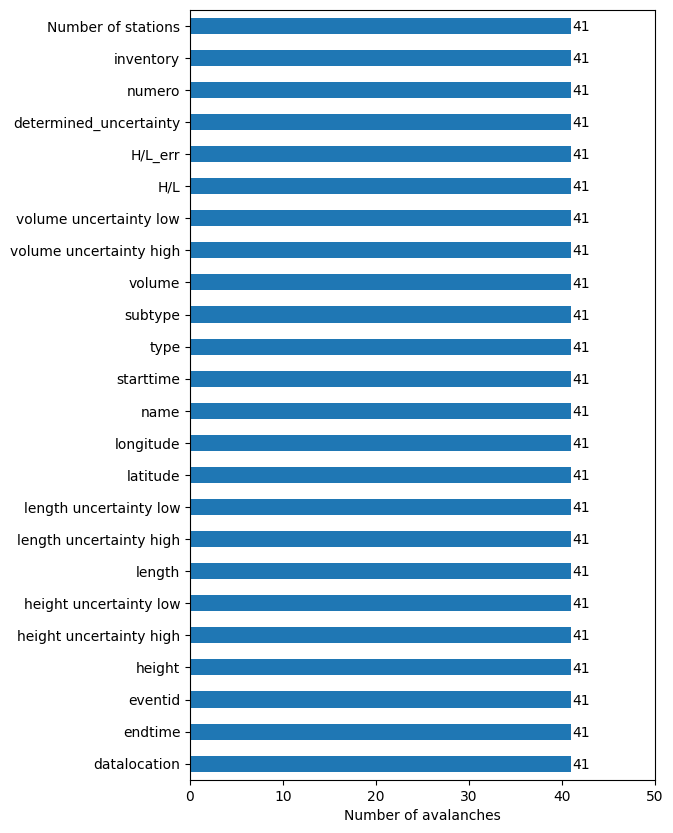

In [7]:
ESEC_avalanches = catalog.load("catalog/7_ESEC_avalanches_42.pickle")

histograms.open_catalog(ESEC_avalanches, pos_number=0.15, xlim=50)

## Spectrum of one of the event trace

  0%|          | 0/41 [00:00<?, ?it/s]

-------------------------
Event numero 0
-------------------------
The distance of the trace is 48.81039753705775
Detection on trace 0


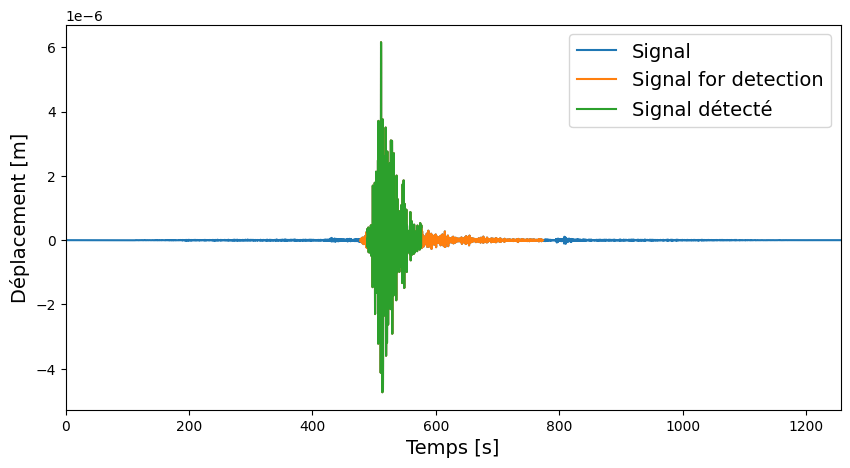

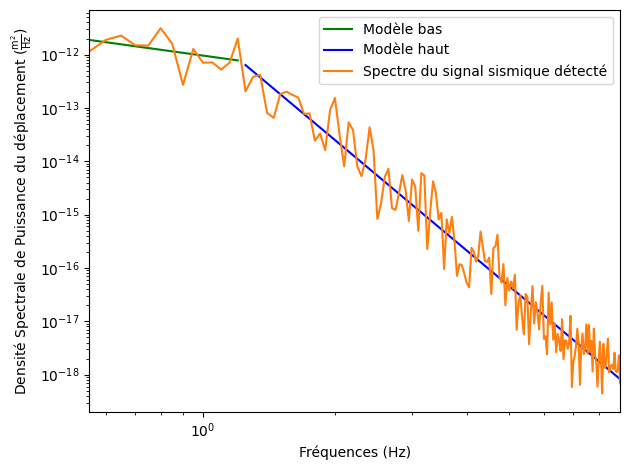

-------------------------
Event numero 2
-------------------------
The distance of the trace is 17.706438612134626
Detection on trace 0


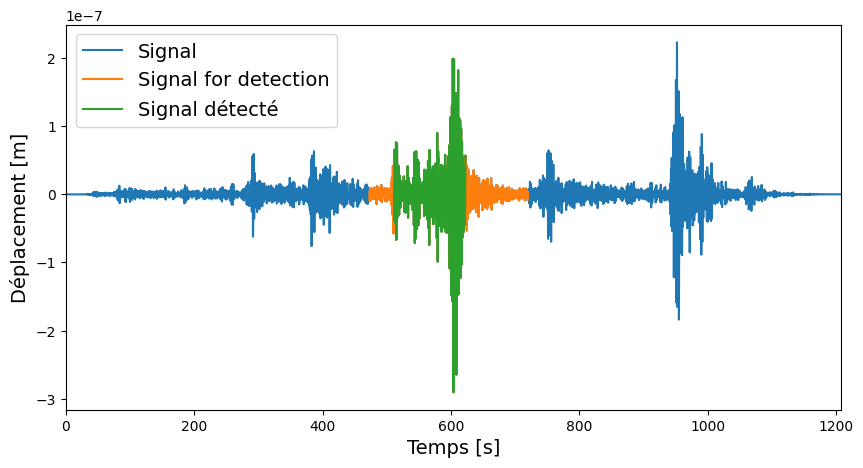

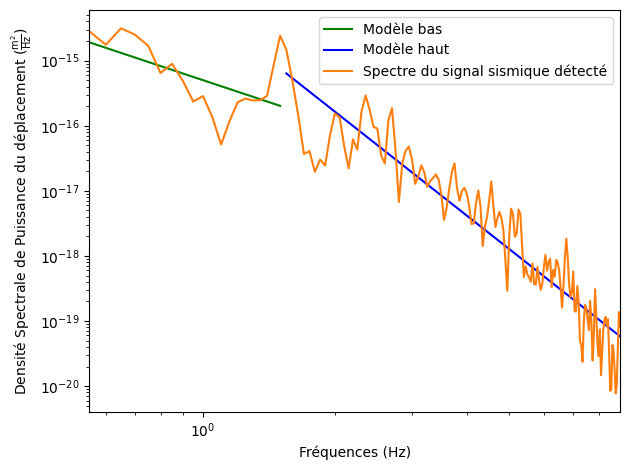

-------------------------
Event numero 3
-------------------------
The distance of the trace is 67.24607360705616
Detection on trace 0


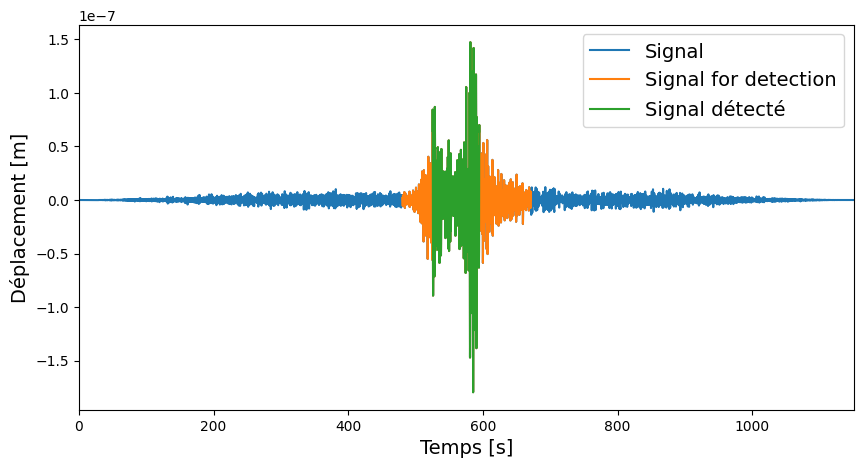

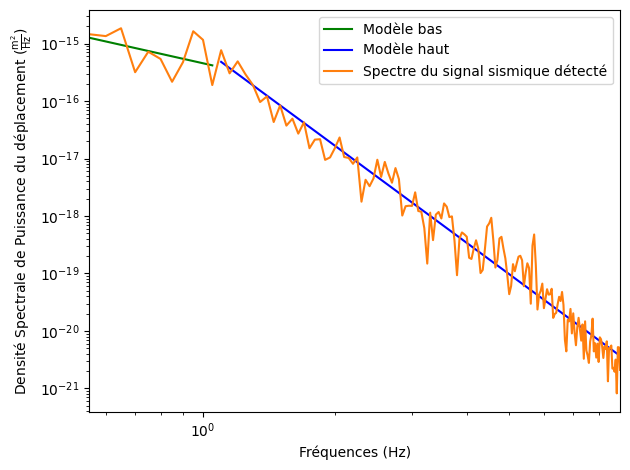

-------------------------
Event numero 5
-------------------------
The distance of the trace is 41.30901063049271
Detection on trace 0


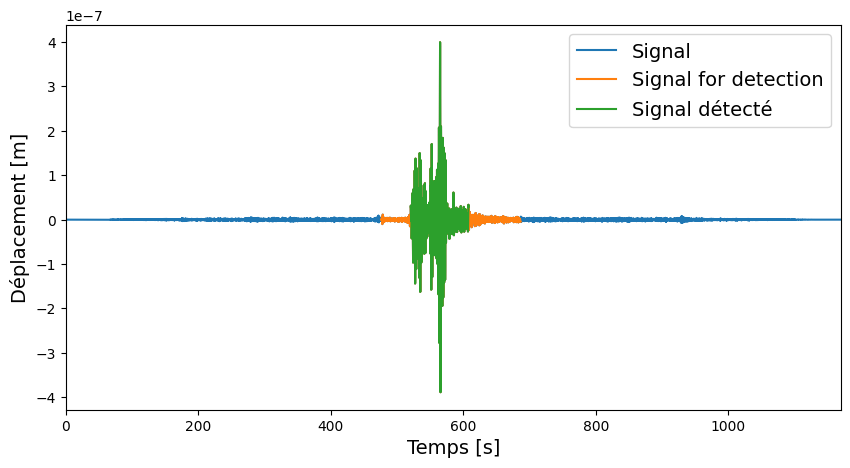

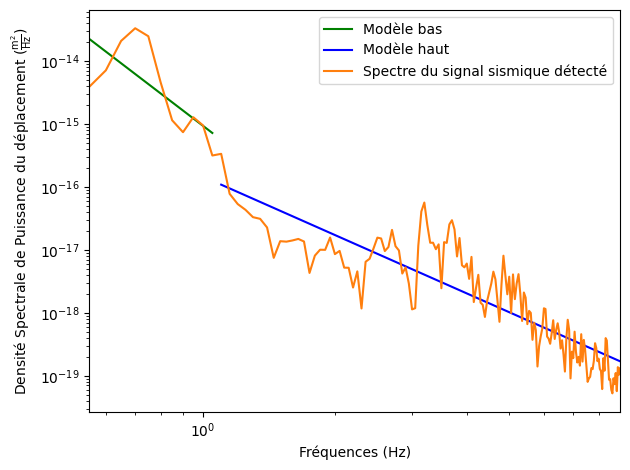

-------------------------
Event numero 6
-------------------------
The distance of the trace is 156.3475108523247
Detection on trace 0


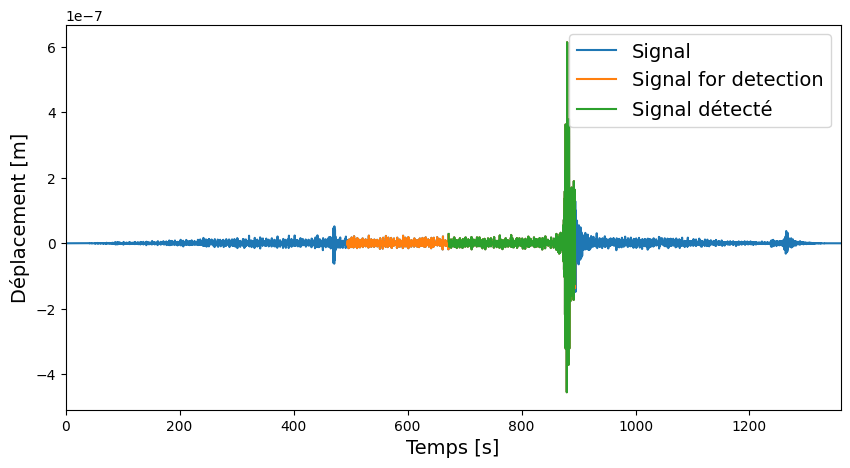

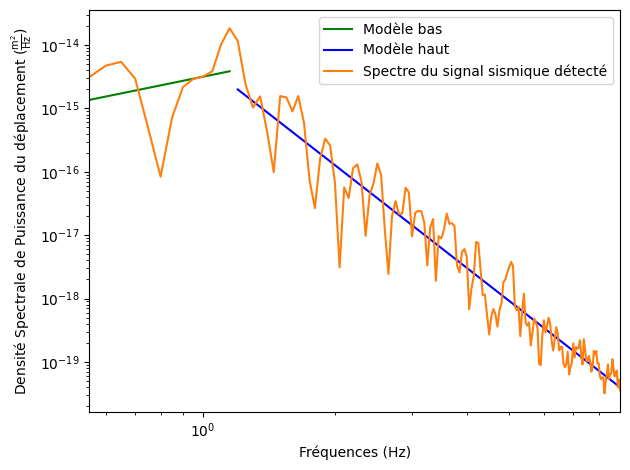

-------------------------
Event numero 8
-------------------------
The distance of the trace is 80.84173760387873
Detection on trace 0


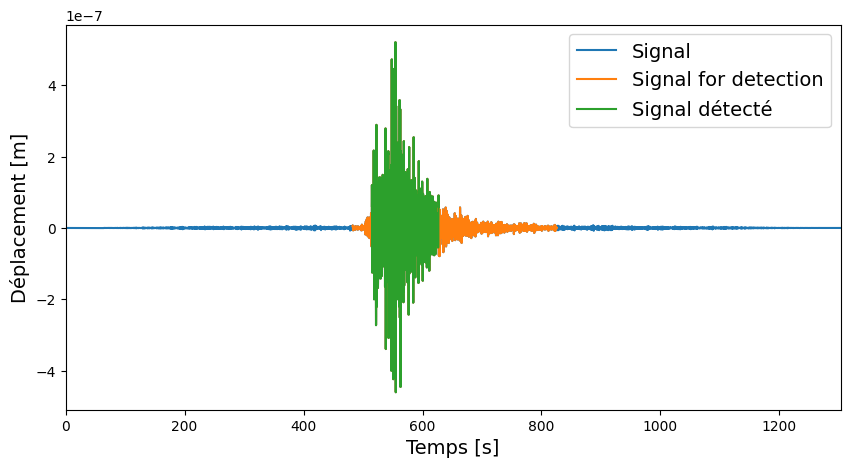

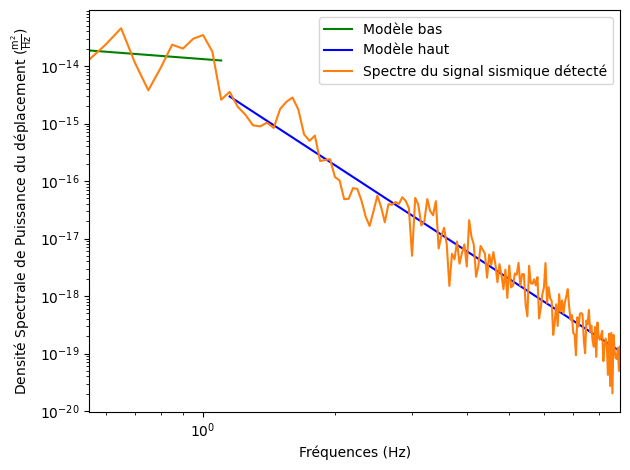

-------------------------
Event numero 9
-------------------------
The distance of the trace is 63.49445548122539
Detection on trace 0


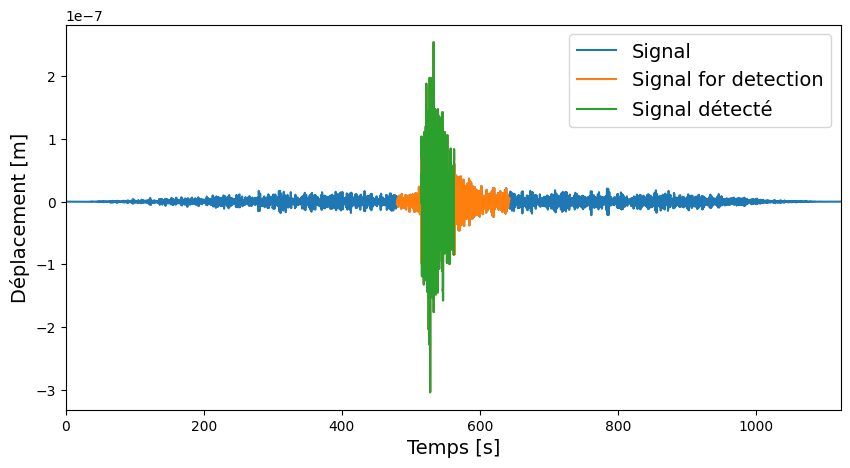

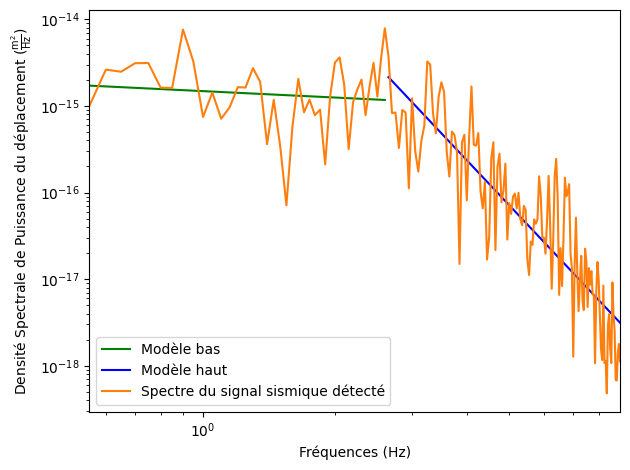

-------------------------
Event numero 10
-------------------------
The distance of the trace is 6.713114336267443
Detection on trace 0


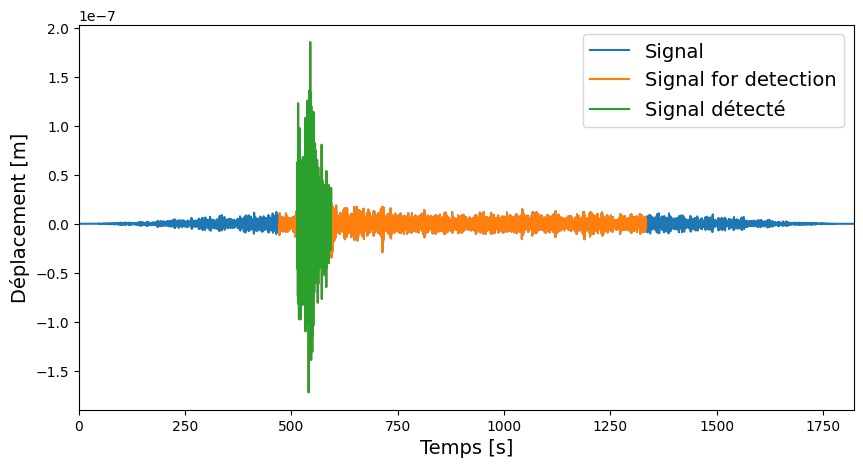

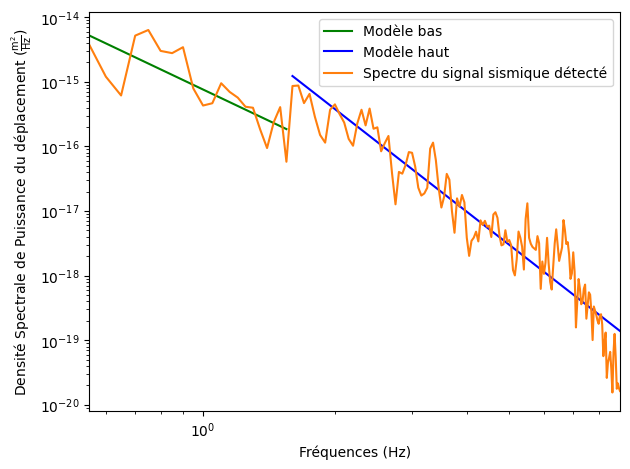

-------------------------
Event numero 11
-------------------------
The distance of the trace is 5.755487205375801
Detection on trace 0


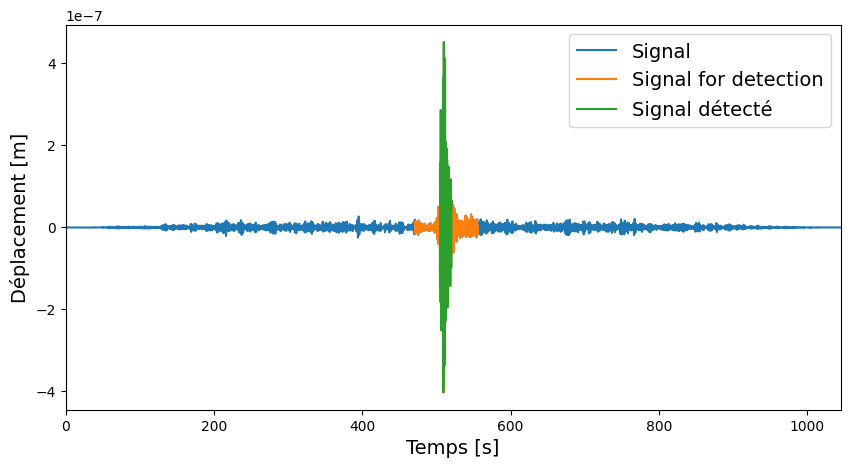

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 771, using nperseg = 771
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


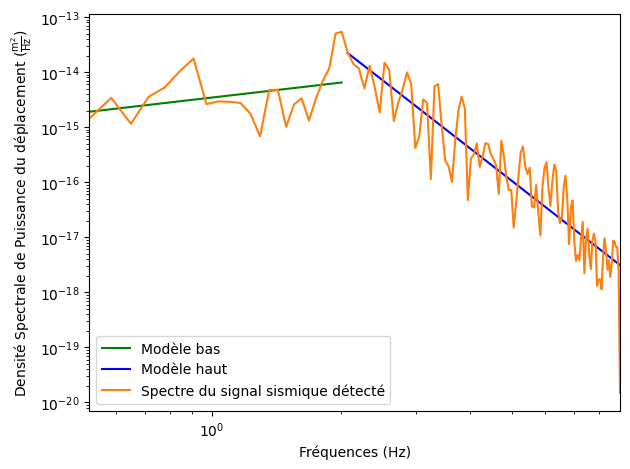

-------------------------
Event numero 21
-------------------------
The distance of the trace is 71.8558083991807
Detection on trace 0


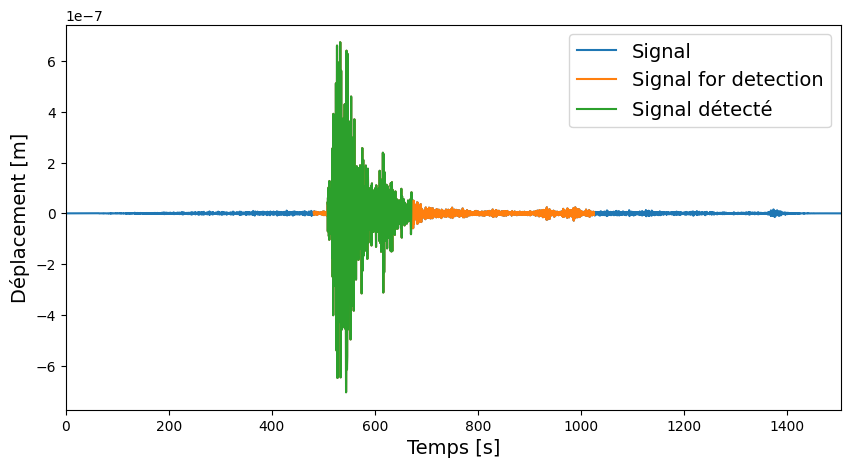

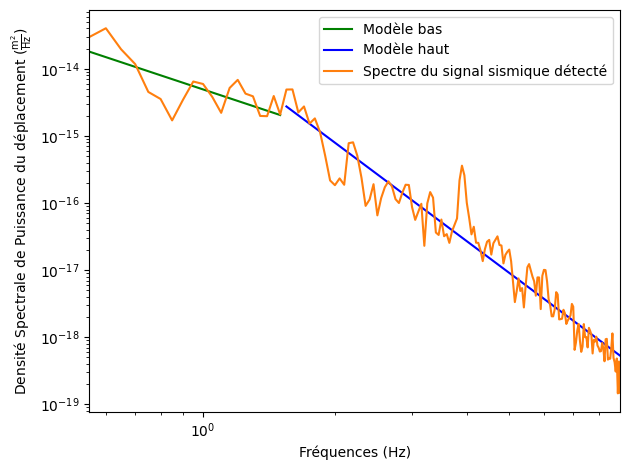

-------------------------
Event numero 22
-------------------------
The distance of the trace is 6.338558874564575
Detection on trace 0


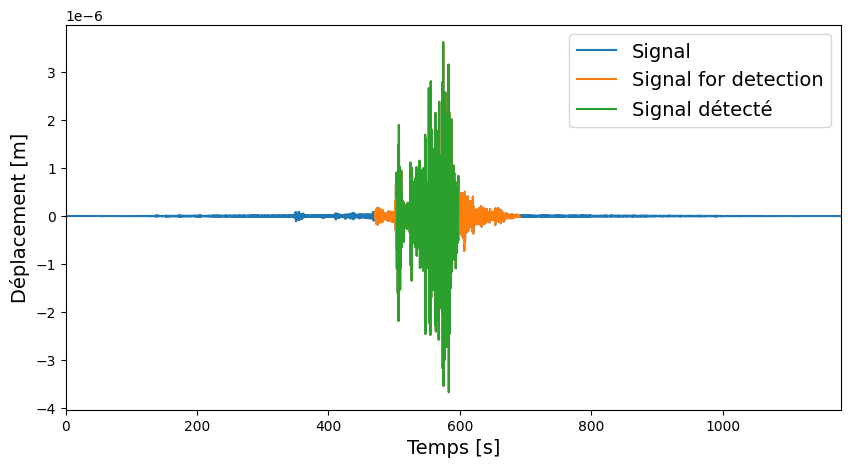

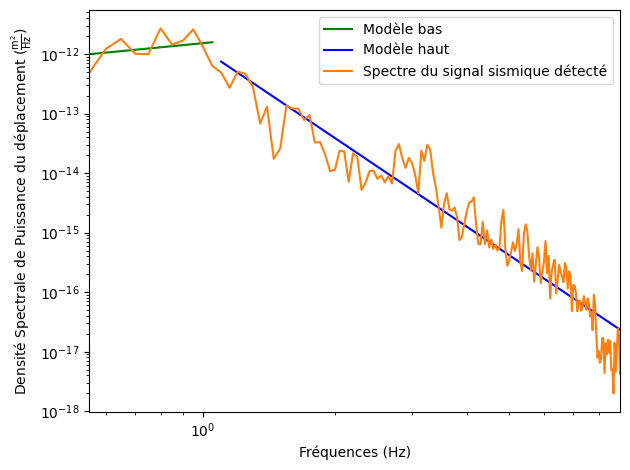

-------------------------
Event numero 23
-------------------------
The distance of the trace is 50.68000097637431
Detection on trace 0


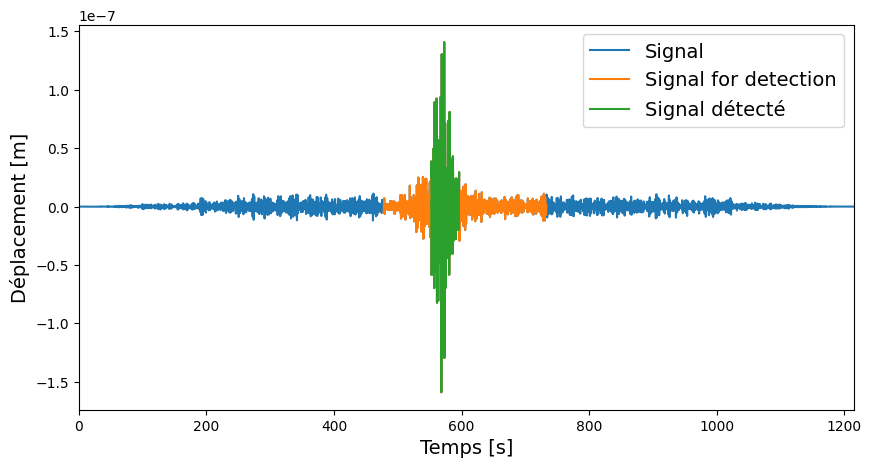

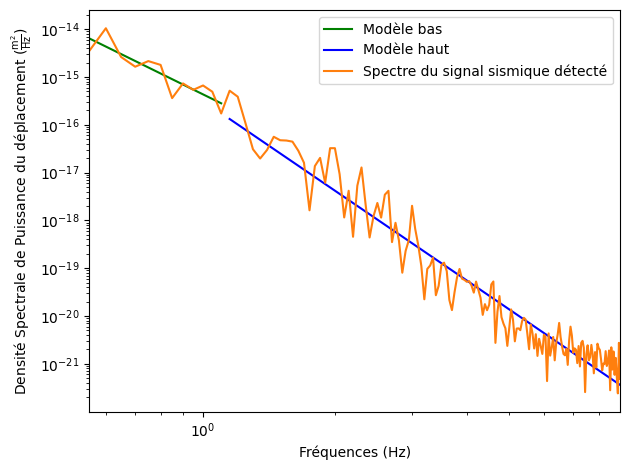

-------------------------
Event numero 24
-------------------------
The distance of the trace is 18.18161655717009
Detection on trace 0


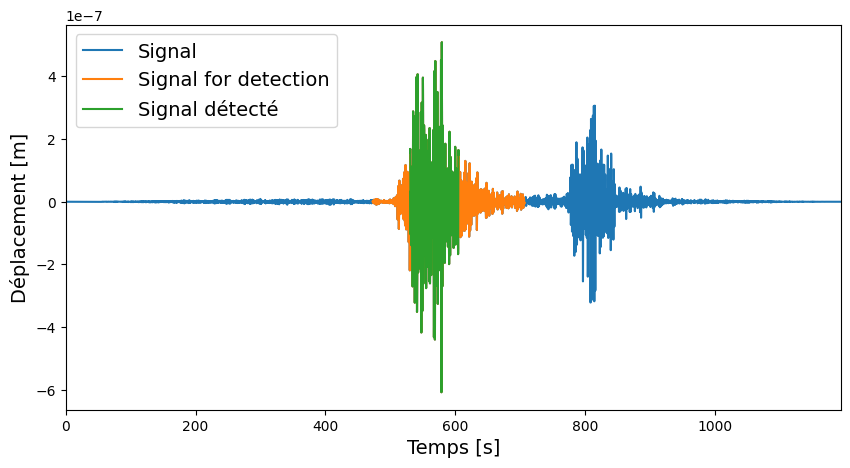

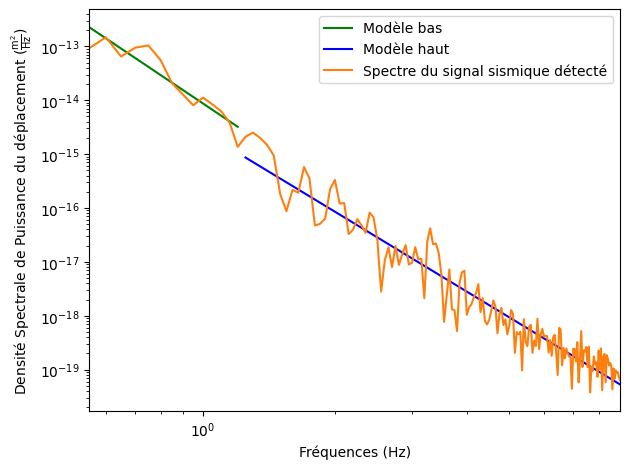

-------------------------
Event numero 26
-------------------------
The distance of the trace is 56.16851705097798
Detection on trace 0


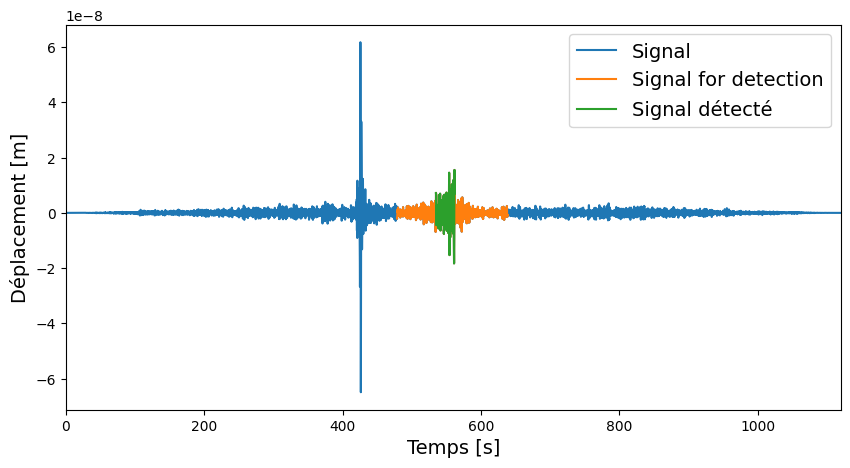

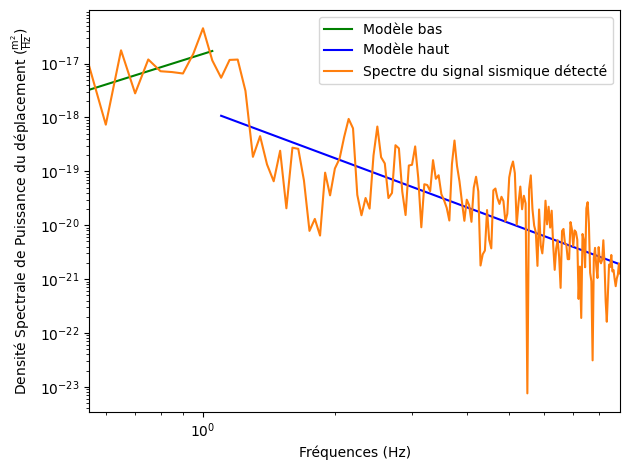

-------------------------
Event numero 27
-------------------------
The distance of the trace is 71.03478628398895
Detection on trace 0


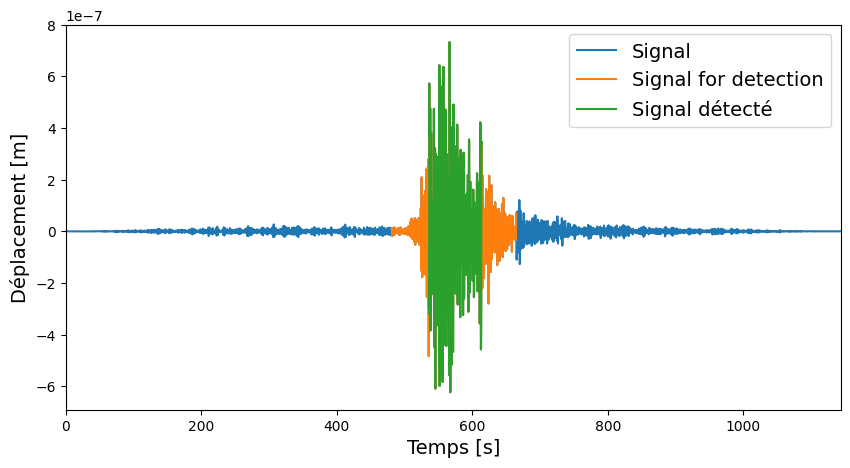

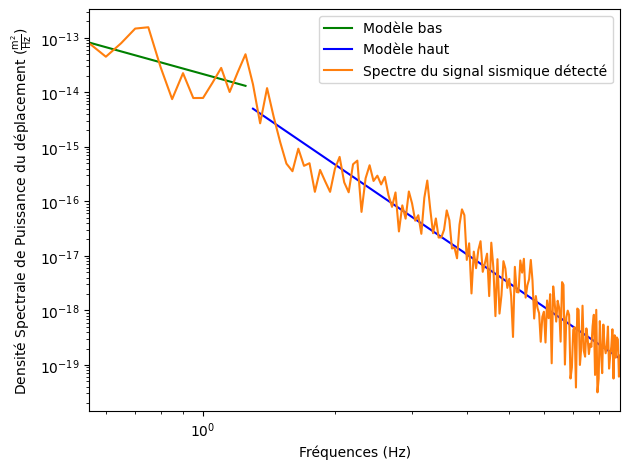

-------------------------
Event numero 28
-------------------------
The distance of the trace is 46.94814284832026
Detection on trace 0


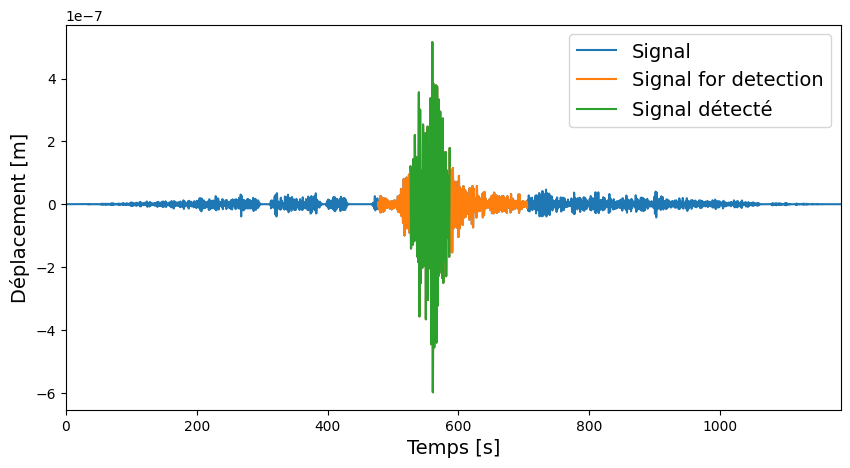

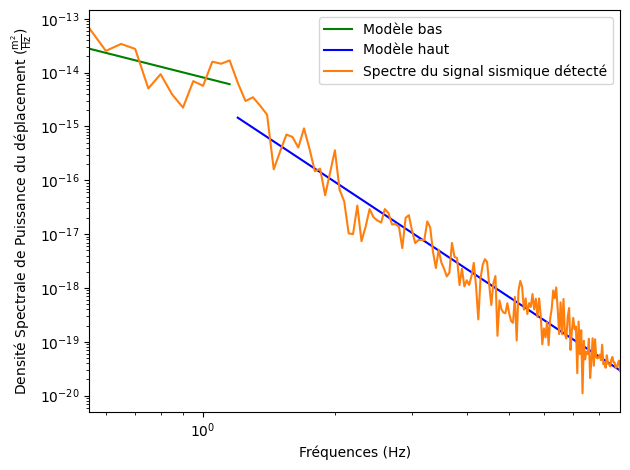

-------------------------
Event numero 32
-------------------------
The distance of the trace is 15.753280920469651
Detection on trace 0


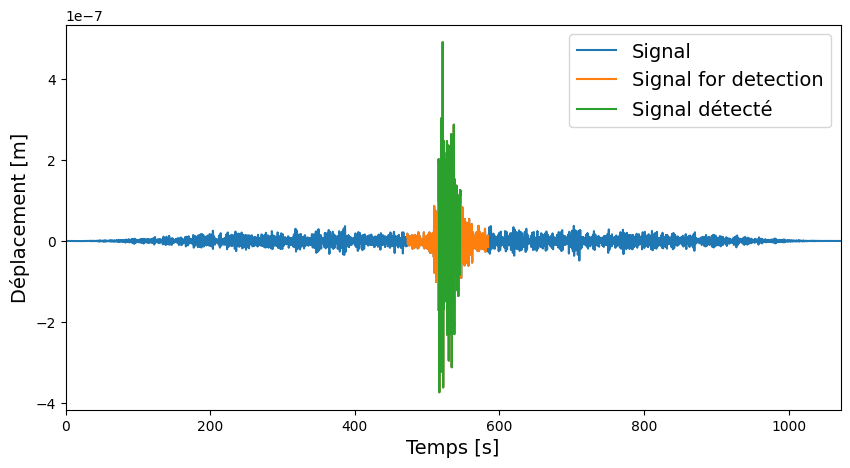

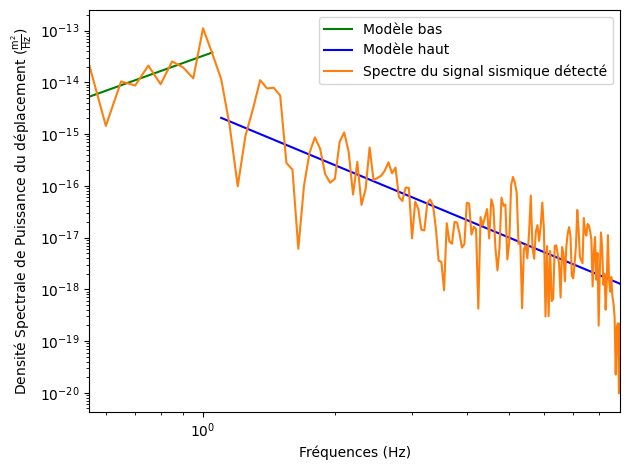

-------------------------
Event numero 36
-------------------------
The distance of the trace is 12.03527266793596
Detection on trace 0


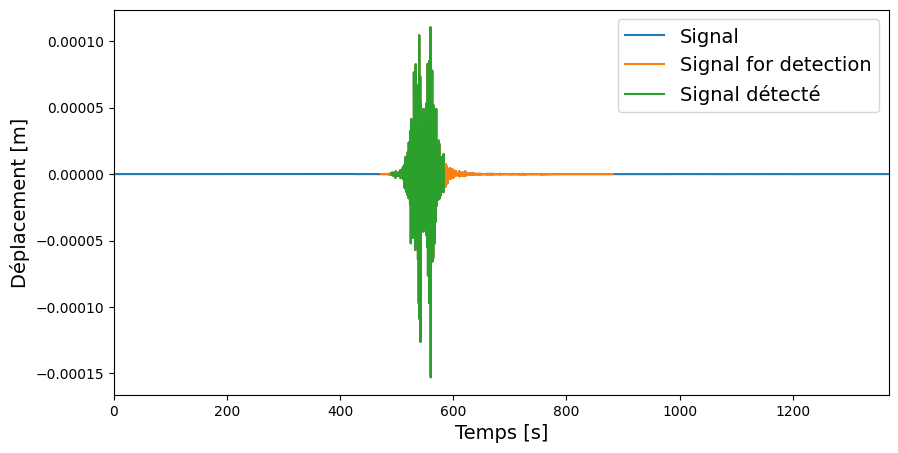

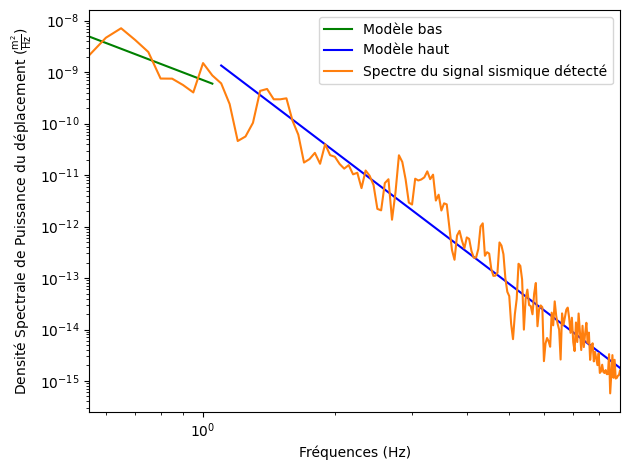

-------------------------
Event numero 37
-------------------------
The distance of the trace is 15.002437637969912
Detection on trace 0


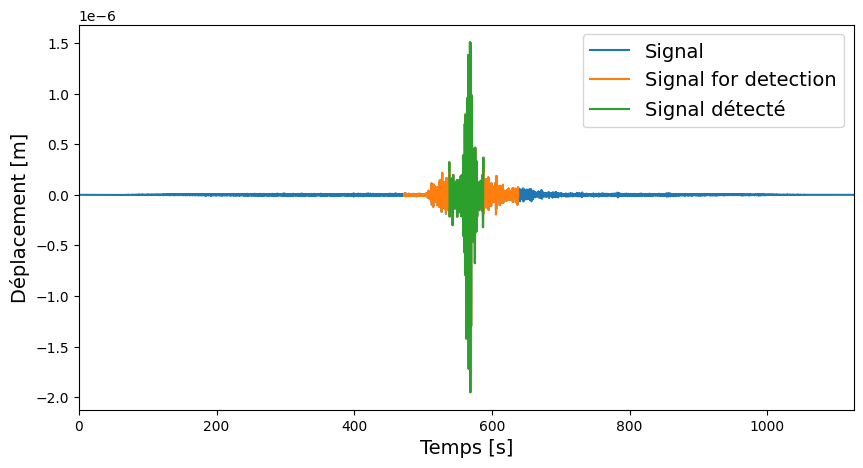

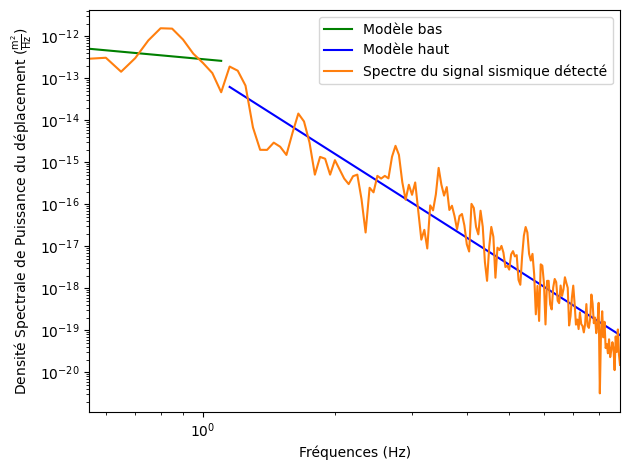

-------------------------
Event numero 38
-------------------------
The distance of the trace is 35.32501028979229
Detection on trace 0


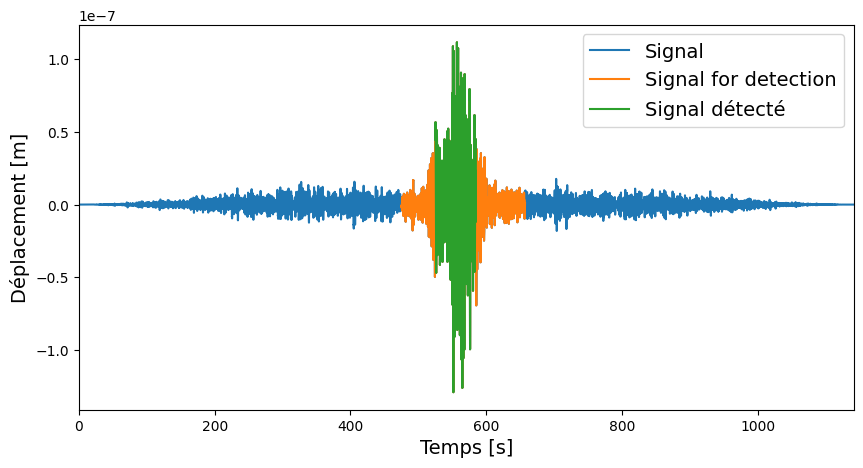

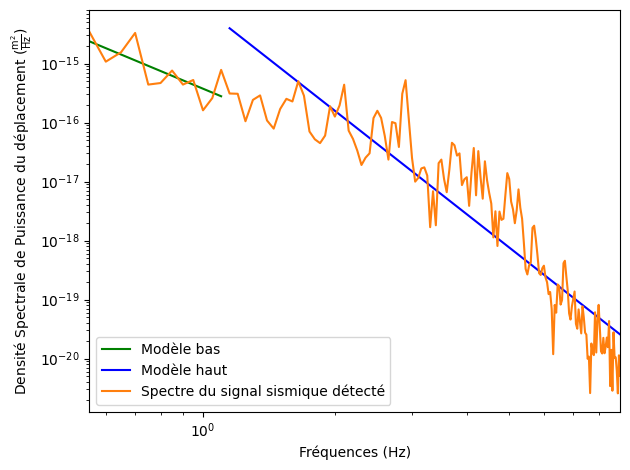

-------------------------
Event numero 39
-------------------------
The distance of the trace is 24.47873020467683
Detection on trace 0


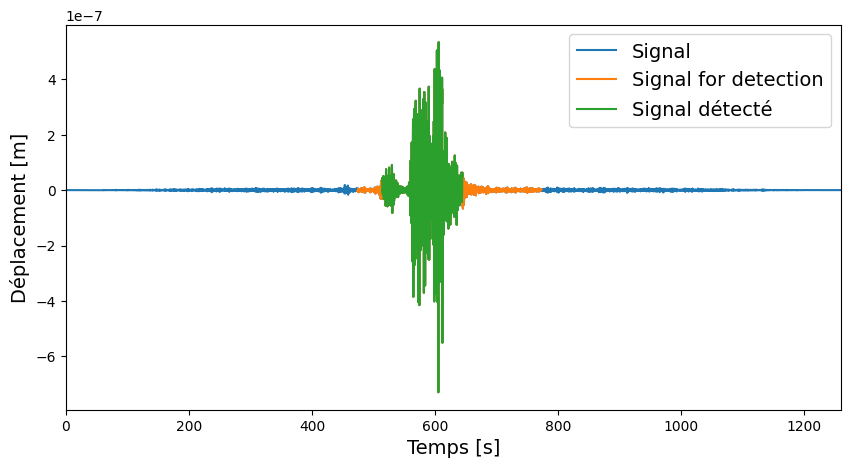

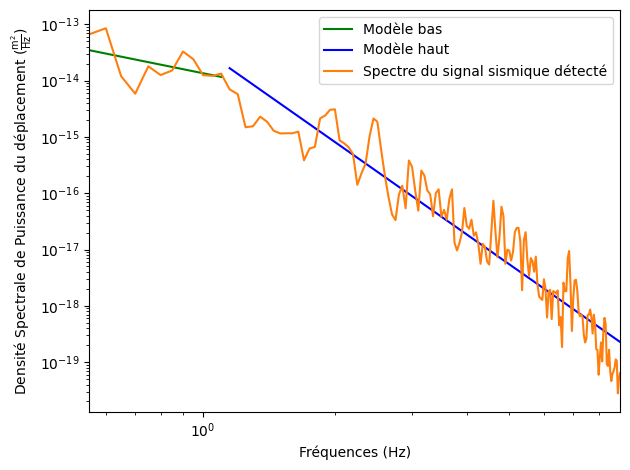

-------------------------
Event numero 40
-------------------------
The distance of the trace is 48.81039753705775
Detection on trace 0


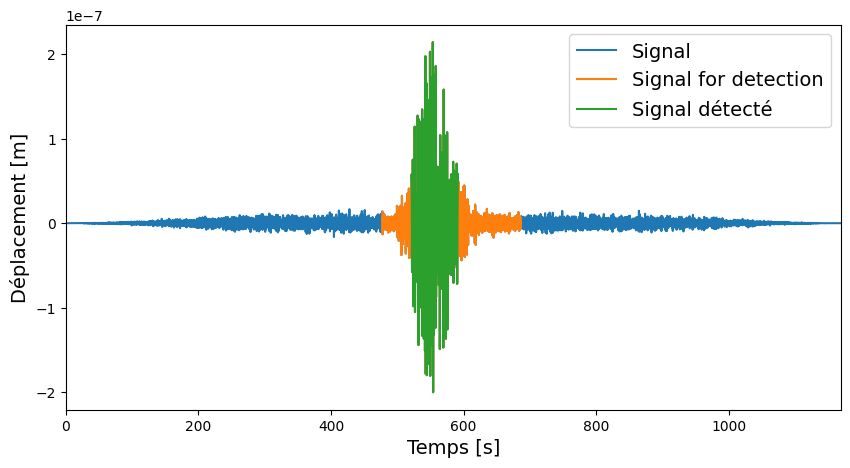

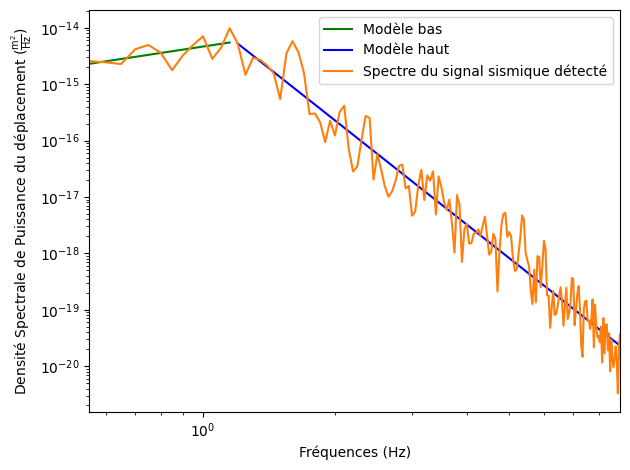

-------------------------
Event numero 41
-------------------------
The distance of the trace is 10.939019253784037
Detection on trace 0


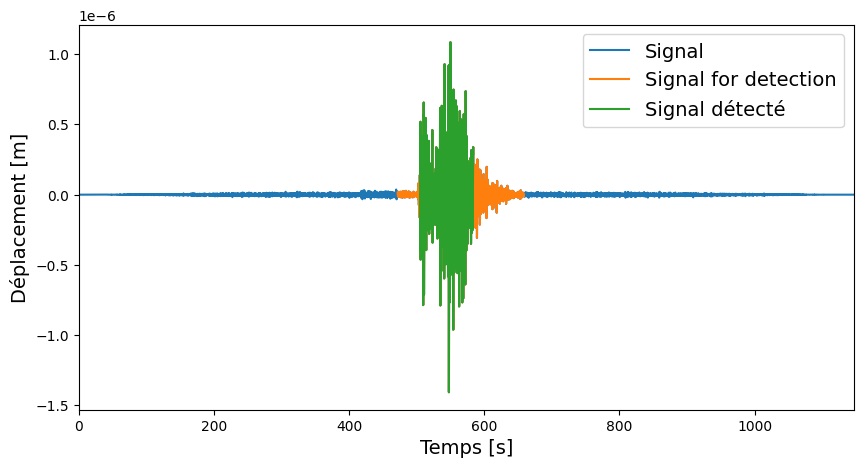

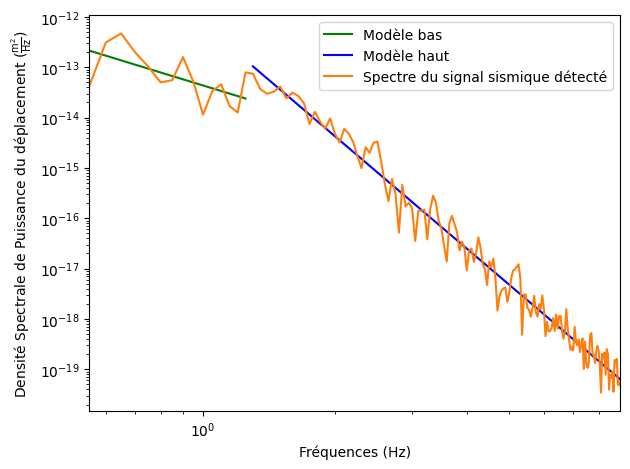

-------------------------
Event numero 42
-------------------------
The distance of the trace is 69.66579433857272
Detection on trace 0


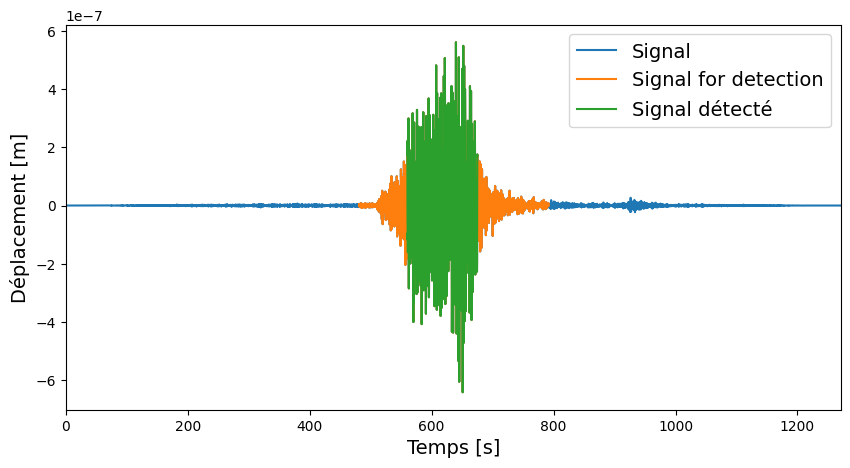

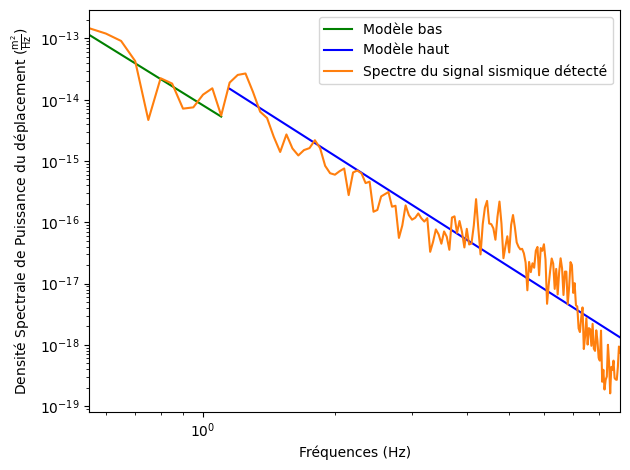

-------------------------
Event numero 43
-------------------------
The distance of the trace is 374.1234855626473
Detection on trace 0


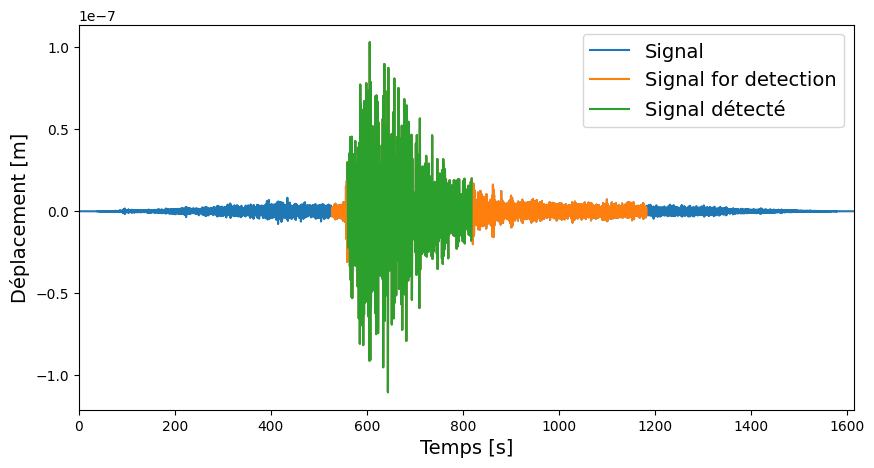

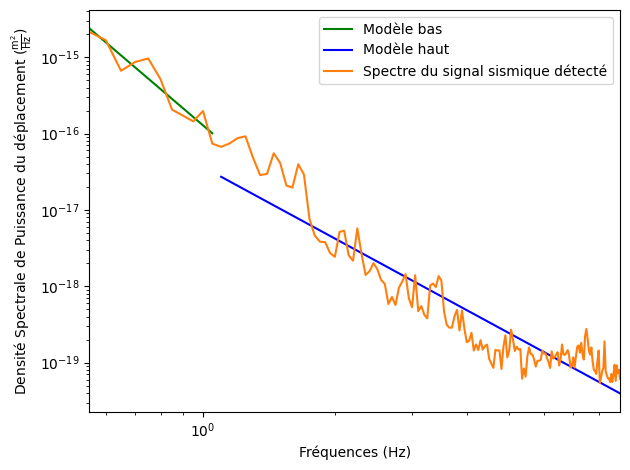

-------------------------
Event numero 46
-------------------------
The distance of the trace is 28.39509627026777
Detection on trace 0


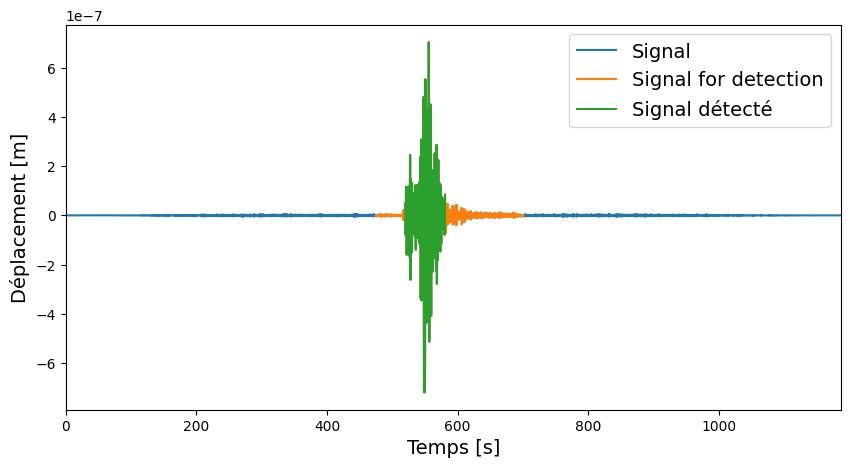

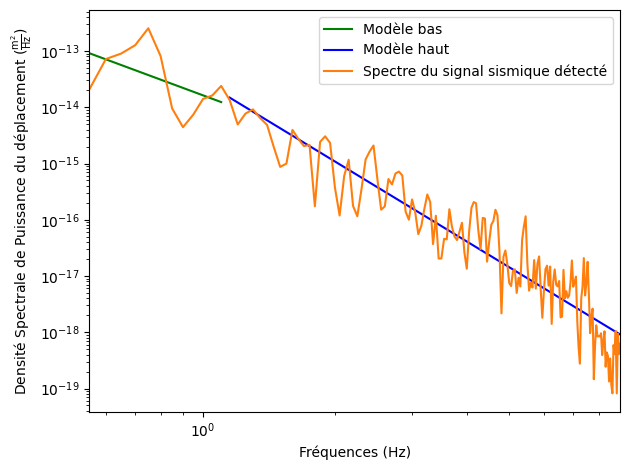

-------------------------
Event numero 47
-------------------------
The distance of the trace is 65.4712195650786
Detection on trace 0


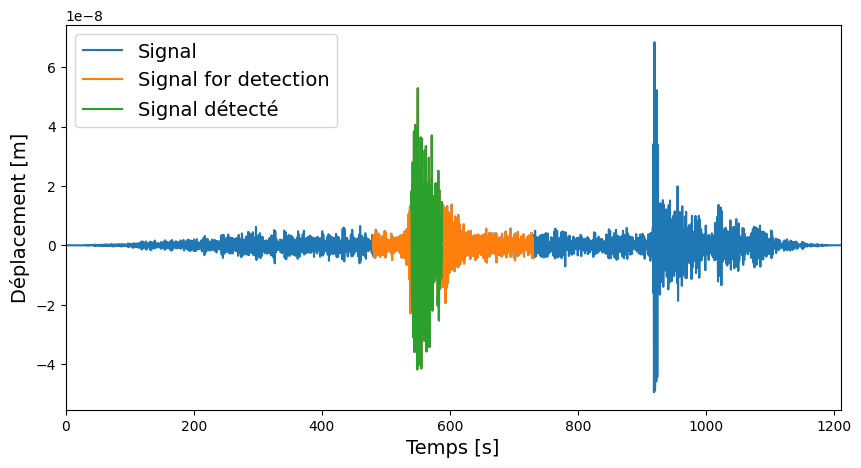

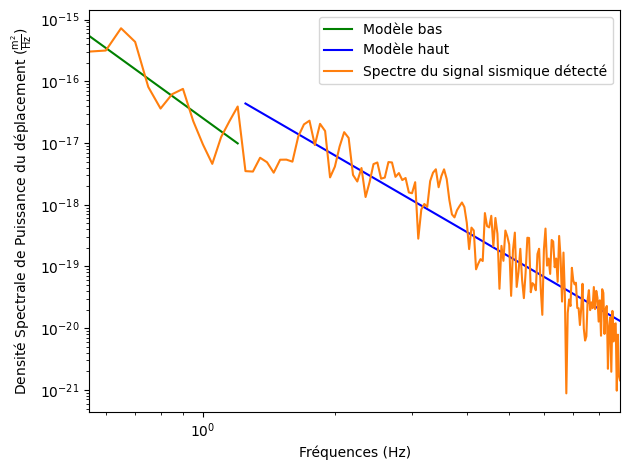

-------------------------
Event numero 48
-------------------------
The distance of the trace is 13.722433101857618
Detection on trace 0


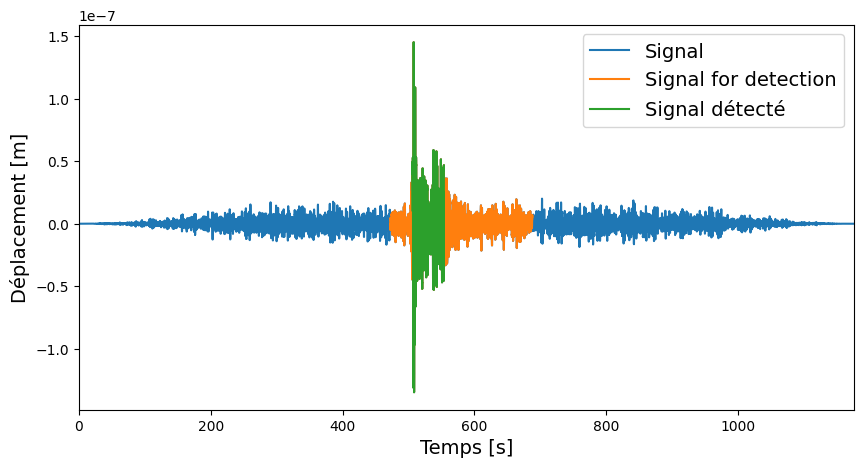

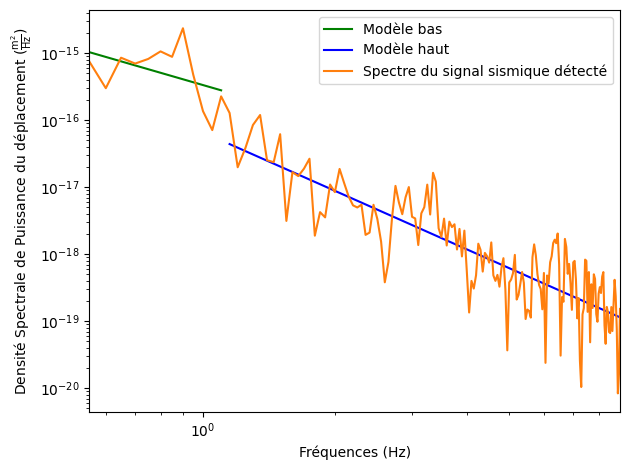

-------------------------
Event numero 49
-------------------------
The distance of the trace is 46.29233658345037
Detection on trace 0


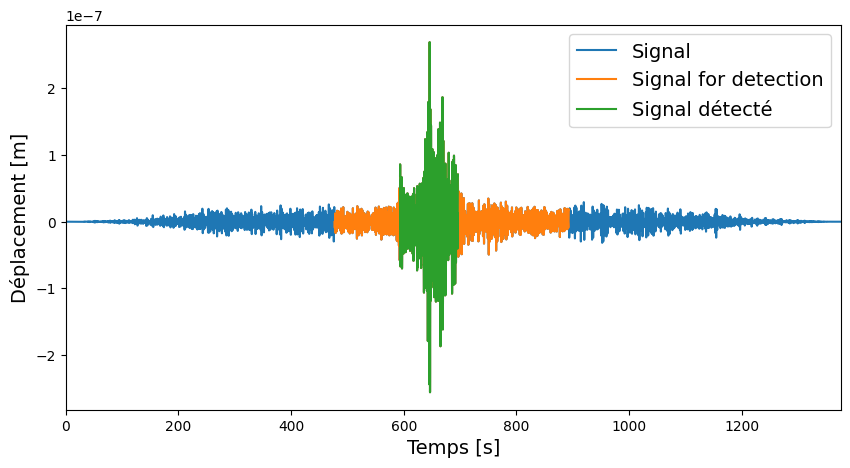

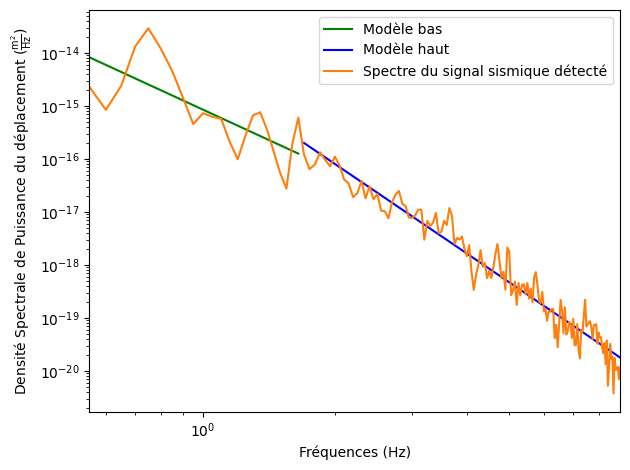

-------------------------
Event numero 50
-------------------------
The distance of the trace is 8.02712459816291
Detection on trace 0


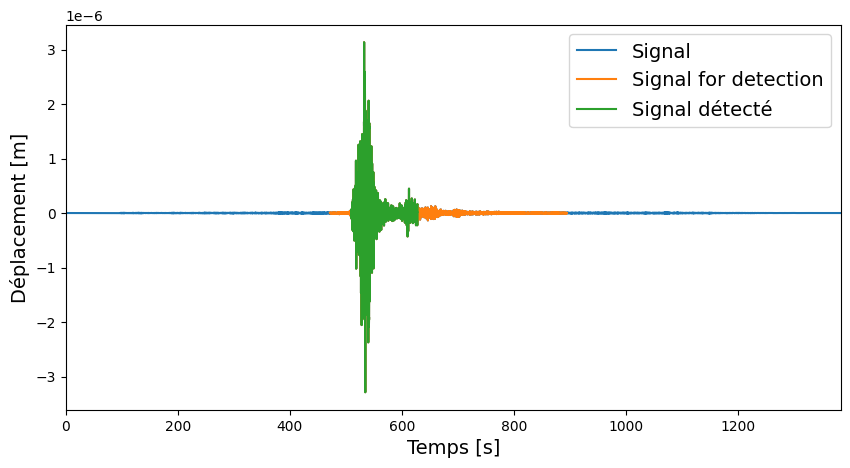

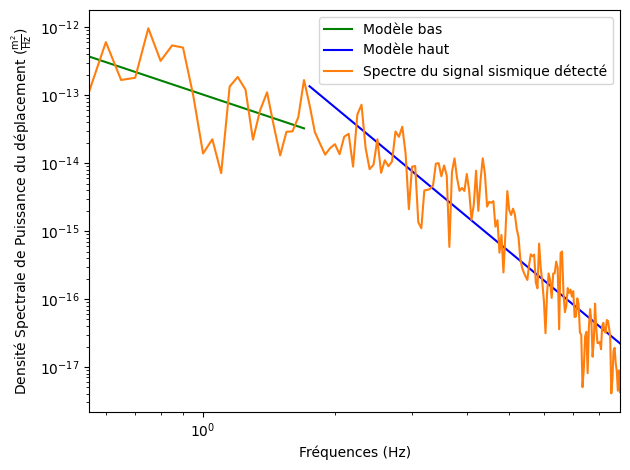

-------------------------
Event numero 53
-------------------------
The distance of the trace is 51.02335286912581
Detection on trace 0


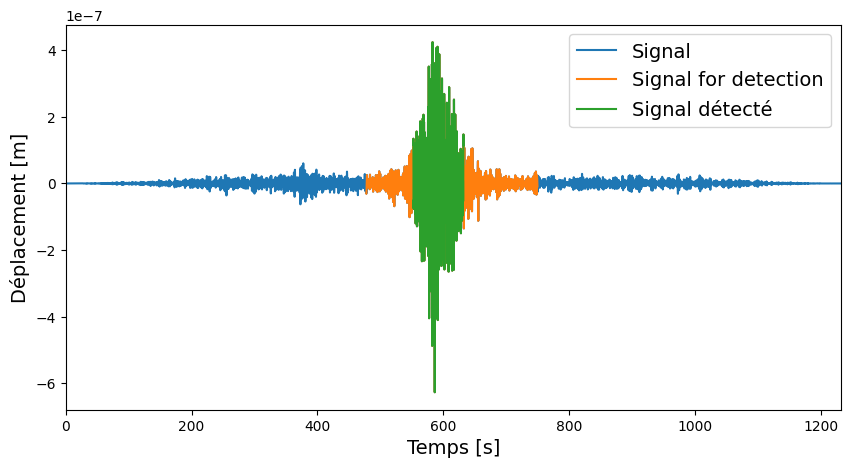

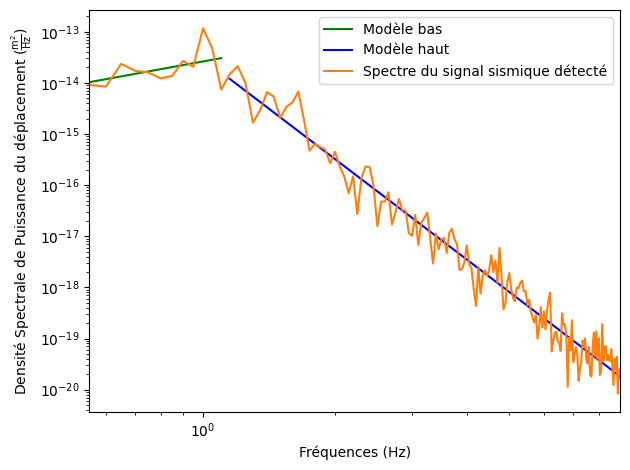

-------------------------
Event numero 57
-------------------------
The distance of the trace is 41.331622923491686
Detection on trace 0


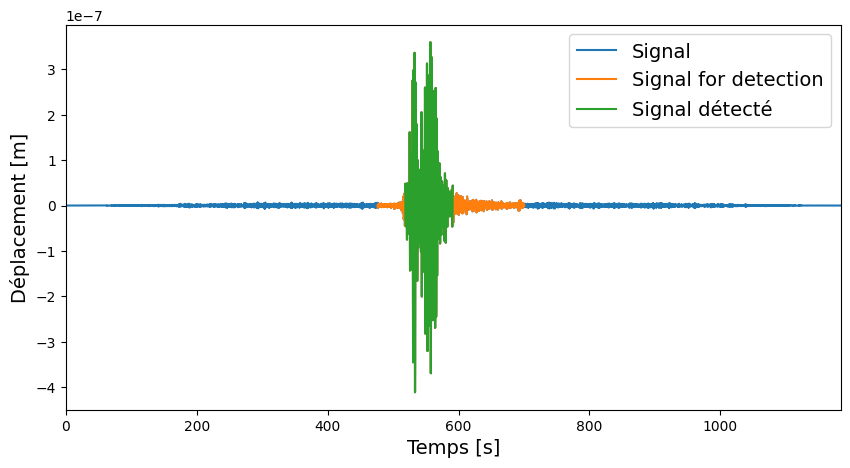

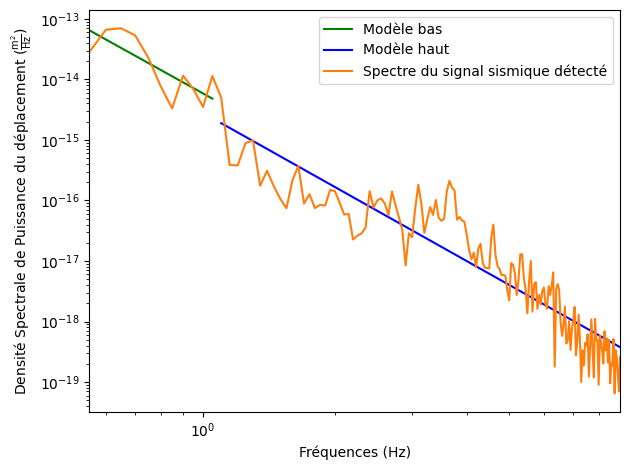

-------------------------
Event numero 60
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 4 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


The distance of the trace is 27.701041735397084
Detection on trace 0


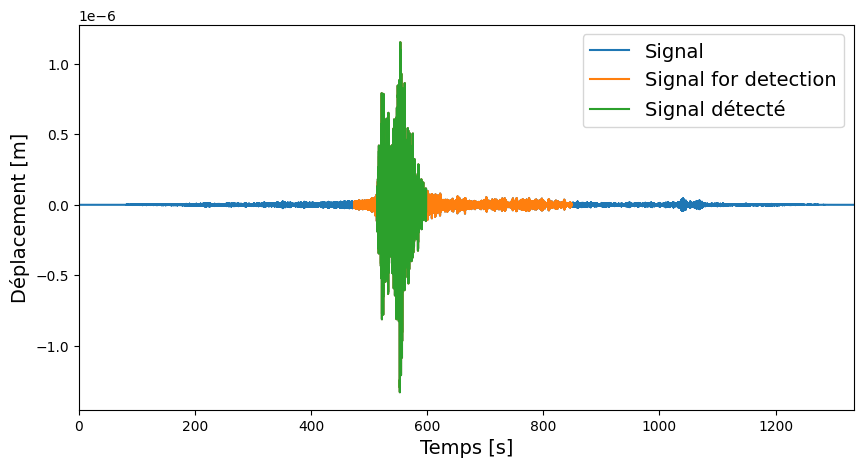

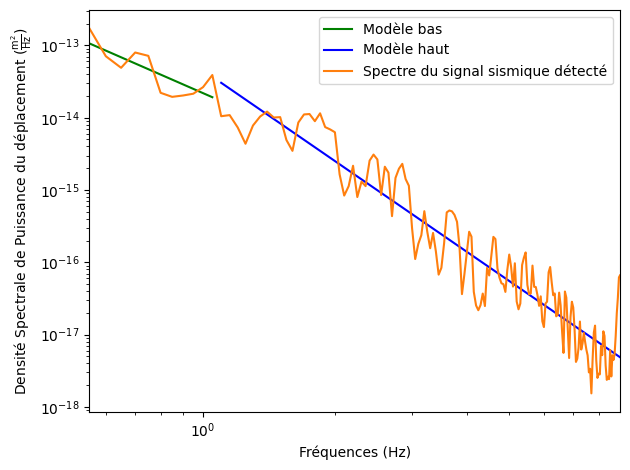

-------------------------
Event numero 62
-------------------------
The distance of the trace is 13.62326614267406
Detection on trace 0


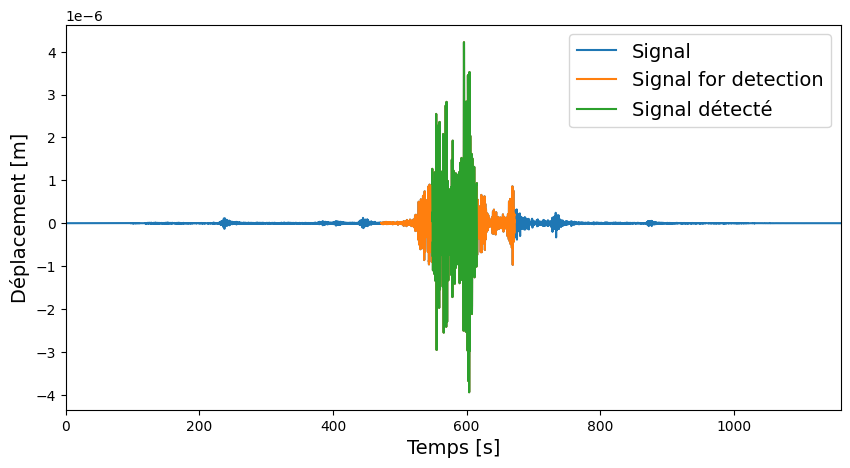

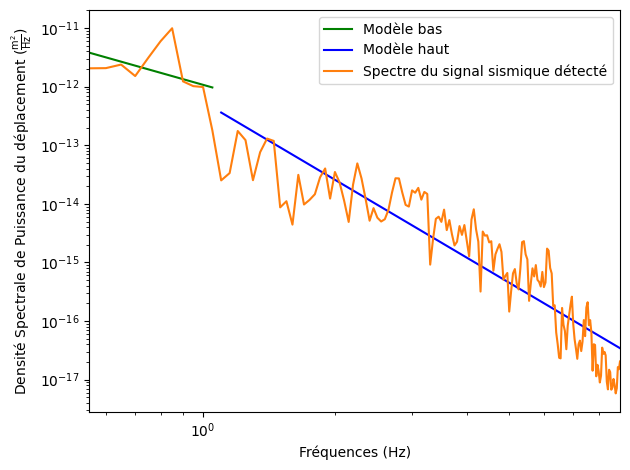

-------------------------
Event numero 67
-------------------------
The distance of the trace is 13.62326614267406
Detection on trace 0


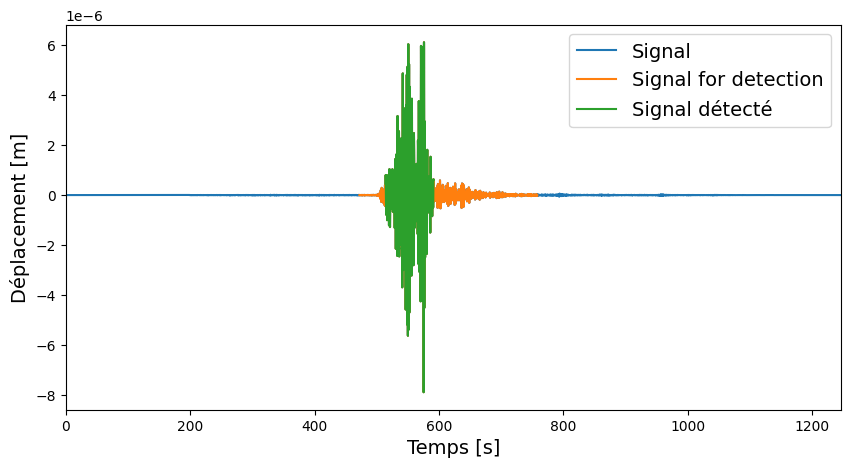

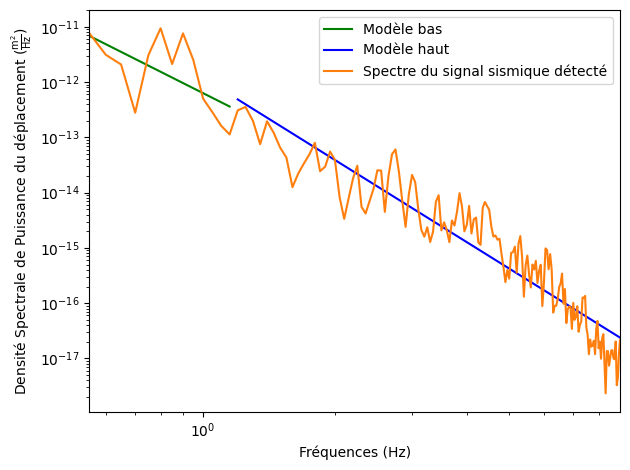

-------------------------
Event numero 72
-------------------------
The distance of the trace is 26.476790947195617
Detection on trace 0


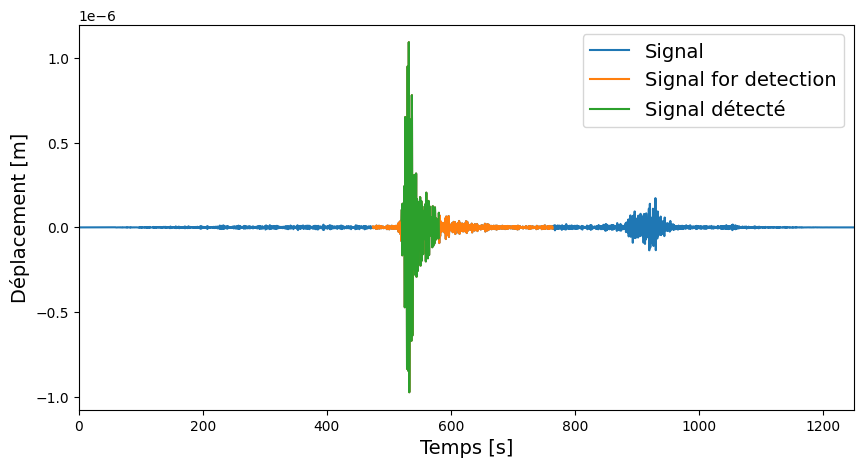

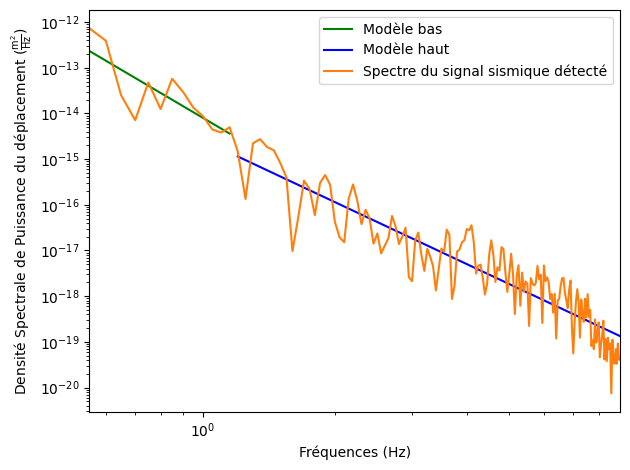

-------------------------
Event numero 78
-------------------------
The distance of the trace is 15.019977789948488
Detection on trace 0


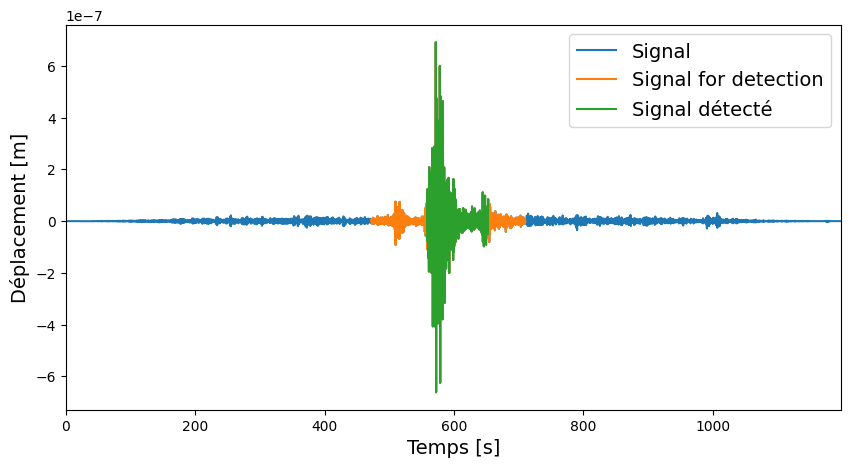

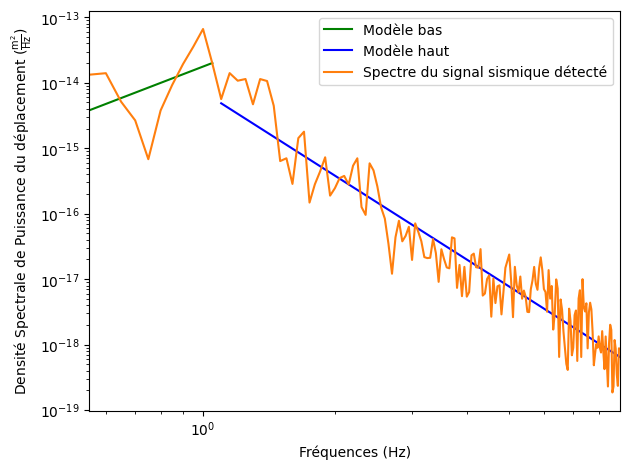

-------------------------
Event numero 80
-------------------------
The distance of the trace is 86.32450135395642
Detection on trace 0


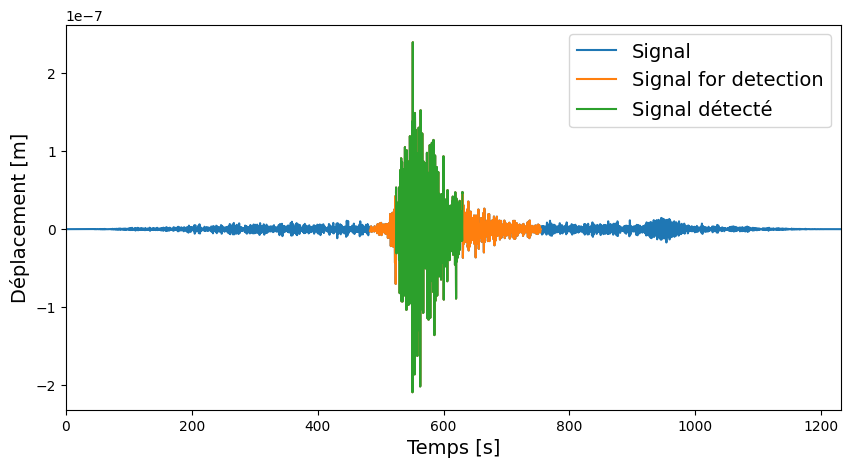

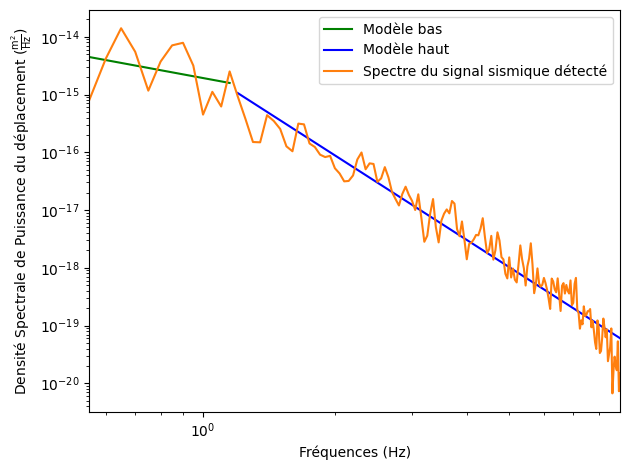

-------------------------
Event numero 81
-------------------------
The distance of the trace is 21.17416556830685
Detection on trace 0


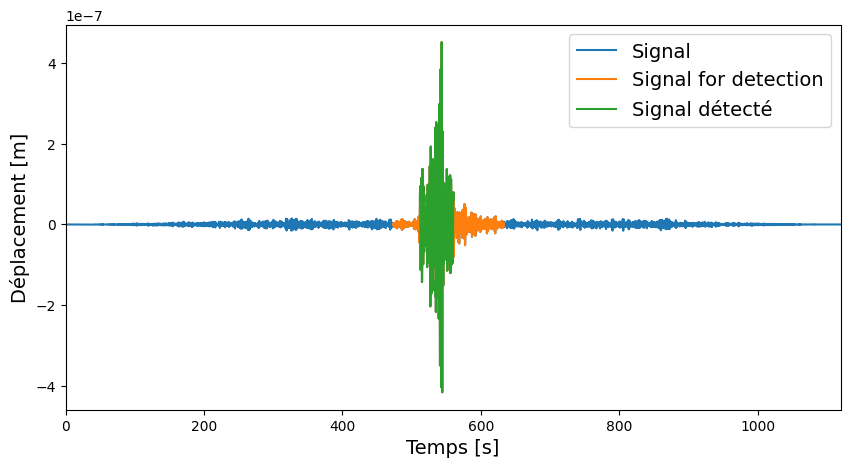

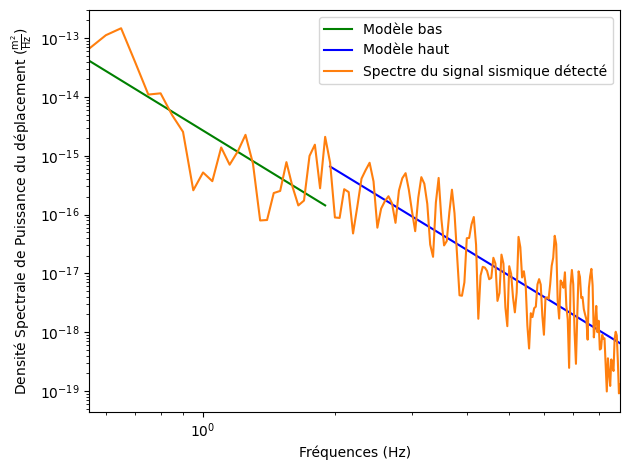

-------------------------
Event numero 85
-------------------------
The distance of the trace is 95.81345025290146
Detection on trace 0


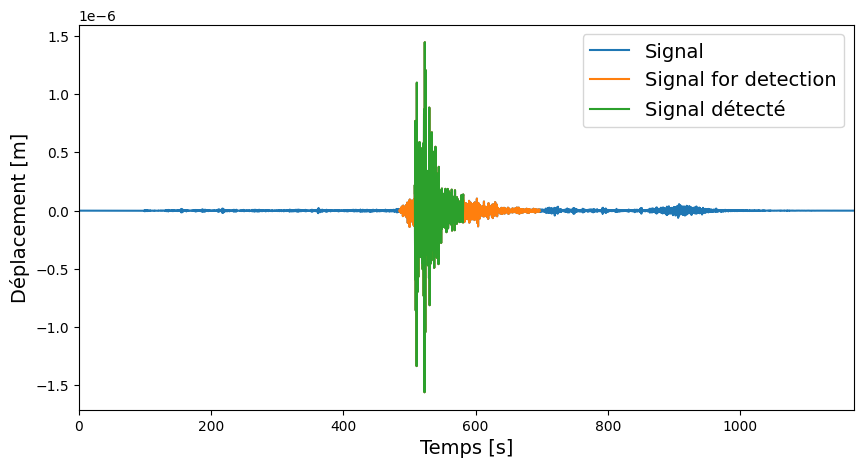

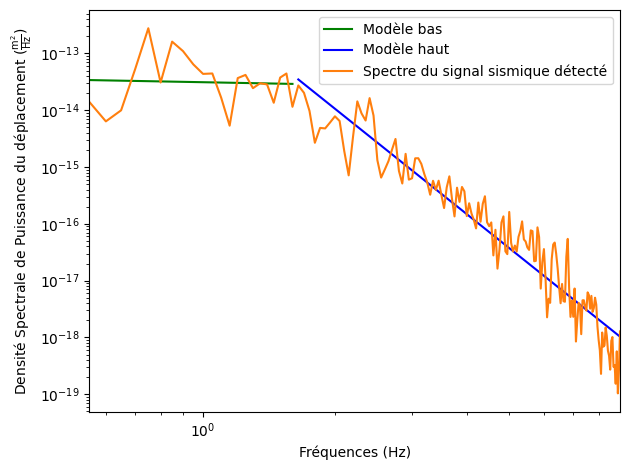

-------------------------
Event numero 87
-------------------------
The distance of the trace is 78.54479063173196
Detection on trace 0


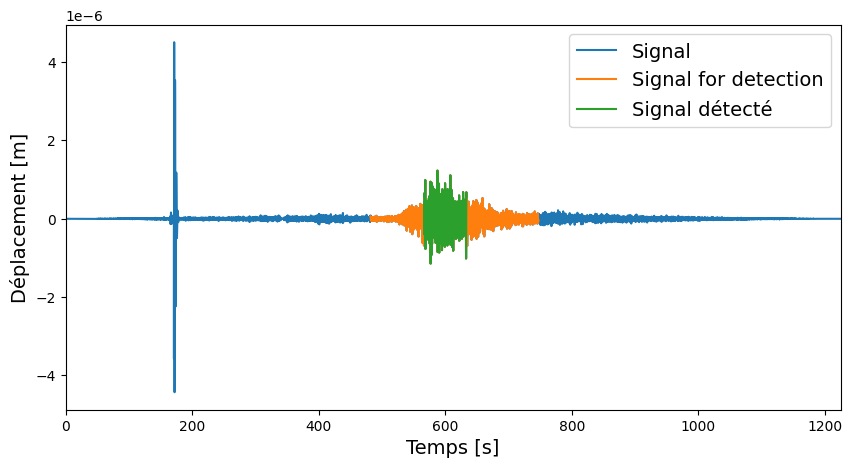

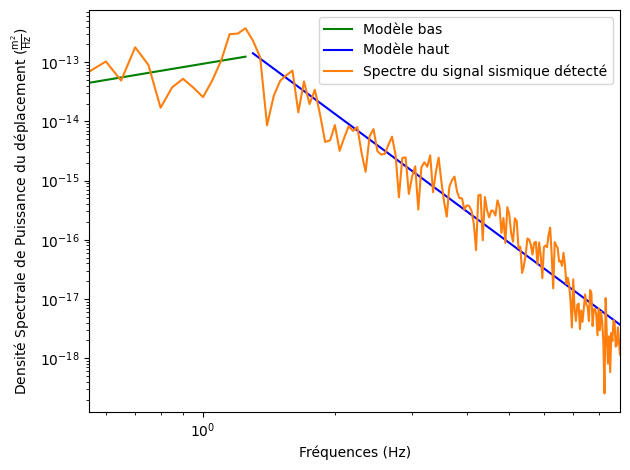

In [10]:
for event_index in tqdm(ESEC_avalanches["numero"], total=len(ESEC_avalanches)):
    print("-------------------------")
    print("Event numero", event_index)
    print("-------------------------")
    
    _, stream, trace = analysis.filter_stream(ESEC_avalanches, event_index, 0, freq_HP=9, freq_LP=0.5)

    #Detection method
    detection_yes_or_no = []
    time_start_detection, data_start_detection, trimmed_time, trimmed_data, time_raw, data_raw, seuil_haut, seuil_bas, _ = analysis.methode_de_detection_totale(trace, ESEC_avalanches, event_index, -30, 10, detection_yes_or_no, 0)

    analysis.plot_detected_trace(time_raw, data_raw, time_start_detection, data_start_detection, trimmed_time, trimmed_data)

    #try:
    curve_params = analysis.plot_spectre(trace, ESEC_avalanches, trimmed_data, 0, event_index, conserv_result=True)
    #except:
    #    print("Pas de détection")